# Set Membership

The cell below defines two **abstract classes**: the first represents a set and basic insert/search operations on it. You will need to impement this API four times, to implement (1) sequential search, (2) binary search tree, (3) balanced search tree, and (4) bloom filter. The second defines the synthetic data generator you will need to implement as part of your experimental framework. <br><br>**Do NOT modify the next cell** - use the dedicated cells further below for your implementation instead. <br>

In [11]:
# DO NOT MODIFY THIS CELL

from abc import ABC, abstractmethod   

# abstract class to represent a set and its insert/search operations
class AbstractSet(ABC):
    
    # constructor
    @abstractmethod
    def __init__(self):
        pass           
        
    # inserts "element" in the set
    # returns "True" after successful insertion, "False" if the element is already in the set
    # element : str
    # inserted : bool
    @abstractmethod
    def insertElement(self, element):     
        inserted = False
        return inserted   
    
    # checks whether "element" is in the set
    # returns "True" if it is, "False" otherwise
    # element : str
    # found : bool
    @abstractmethod
    def searchElement(self, element):
        found = False
        return found    
    
    
    
# abstract class to represent a synthetic data generator
class AbstractTestDataGenerator(ABC):
    
    # constructor
    @abstractmethod
    def __init__(self):
        pass           
        
    # creates and returns a list of length "size" of strings
    # size : int
    # data : list<str>
    @abstractmethod
    def generateData(self, size):     
        data = [""]*size
        return data   


Use the cell below to define any auxiliary data structure and python function you may need. Leave the implementation of the main API to the next code cells instead.

In [12]:
# ADD AUXILIARY DATA STRUCTURE DEFINITIONS AND HELPER CODE HERE



Use the cell below to implement the requested API by means of **sequential search**.

In [13]:
class SequentialSearchSet(AbstractSet):
    
    def __init__(self):
        # ADD YOUR CODE HERE
        self.val = []
    
    def insertElement(self, element):
        # ADD YOUR CODE HERE
        for v in self.val:
            if v == element:
                return False
        self.val.append(element)
        return True

    def searchElement(self, element):     
        found = False
        # ADD YOUR CODE HERE
        if element in self.val:
            found = True
        return found    
    
    # delete after testing
    def print_set(self):
        print(self.val)



In [14]:
# Delete this cell before submission.
def sequentialCorrectnessTest():
    test = SequentialSearchSet()
    assert test.insertElement("a") == True
    assert test.insertElement("b") == True
    assert test.insertElement("c") == True
    assert test.insertElement("a") == False
    assert test.insertElement("b") == False
    assert test.insertElement("c") == False
    assert test.searchElement("a") == True
    assert test.searchElement("b") == True
    assert test.searchElement("c") == True
    assert test.searchElement("d") == False
    assert test.searchElement("e") == False
    assert test.searchElement("f") == False
    print("✅ Sequential search correctness test passed")

sequentialCorrectnessTest()

✅ Sequential search correctness test passed


Use the cell below to implement the requested API by means of **binary search tree**

### Ben's implementation

In [45]:
class Node:
    def __init__(self, key):
        self.key = key
        self.left = None
        self.right = None


class BinarySearchTreeSet(AbstractSet):
    def __init__(self):
        self.root = None

    def _key_traverse(self, node, level=0):
        if node is not None:
            self._key_traverse(node.right, level+1)
            print(' ' * 4 * level + '->', node.key)
            self._key_traverse(node.left, level+1)

    def print_keys(self):
        if self.root is None:
            print("")
            return

        self._key_traverse(self.root)

    def insertElement(self, element):
        if self.root is None:
            self.root = Node(element)
            return True

        current = self.root
        while True:
            if element < current.key:
                if current.left is None:
                    current.left = Node(element)
                    return True

                current = current.left

            elif element > current.key:
                if current.right is None:
                    current.right = Node(element)
                    return True

                current = current.right

            else:
                return False

    def searchElement(self, element):
        if self.root is None:
            return False

        current = self.root
        while True:
            if current is None:
                return False

            if current.key == element:
                return True

            if element < current.key:
                current = current.left

            elif element > current.key:
                current = current.right

t = BinarySearchTreeSet()
t.insertElement('c')
t.insertElement('b')
t.insertElement('a')
t.insertElement('e')
t.insertElement('f')
t.insertElement('d')
t.print_keys()



        -> f
    -> e
        -> d
-> c
    -> b
        -> a


In [16]:
# Delete this cell before submission.
def binaryTreeCorrectnessTest():
    test = BinarySearchTreeSet()
    assert test.insertElement("a") == True
    assert test.insertElement("b") == True
    assert test.insertElement("c") == True
    assert test.insertElement("a") == False
    assert test.insertElement("b") == False
    assert test.insertElement("c") == False
    assert test.searchElement("a") == True
    assert test.searchElement("b") == True
    assert test.searchElement("c") == True
    assert test.searchElement("d") == False
    assert test.searchElement("e") == False
    assert test.searchElement("f") == False
    print("✅ Binary tree correctness test passed")

binaryTreeCorrectnessTest()

✅ Binary tree correctness test passed


Use the cell below to implement the requested API by means of **balanced search tree**.

### Baicheng Implementation of Red-Black Tree

In [22]:
class ColourNode():
    def __init__(self, val, color='R'):
        self.key = val
        self.color = color
        self.left = None
        self.right = None
        self.parent = None

        
class BalancedSearchTreeSet():
    def __init__(self):
        self.root = None
    
    def __printCall ( self , node , indent , last ) :
        if node !=  None :
            print(indent, end=' ')
            if last :
                print ("R----",end= ' ')
                indent += "     "
            else :
                print("L----",end=' ')
                indent += "|    "

            s_color = "RED" if node.color == 'R' else "BLACK"
            print ( str ( node.key ) + "(" + s_color + ")" )
            self.__printCall ( node.left , indent , False )
            self.__printCall ( node.right , indent , True )

    # Function to call print
    def print_tree ( self ) :
        self.__printCall ( self.root , "" , True )

    def LR(self, x: ColourNode) -> None:
        y = x.right
        yl = y.left
        x.right = yl
        if yl is not None:
            yl.parent=x
        y.left = x
        y.parent = x.parent

        if x.parent is None: # x is root
            self.root = y
        else:
            if x.parent.left == x:
                x.parent.left = y
            else:
                x.parent.right = y

        x.parent = y
    
    def RR(self, x:ColourNode) -> None:
        y = x.left
        yr = y.right
        x.left = yr
        if yr is not None:
            yr.parent = x
        y.right = x
        y.parent = x.parent

        if x.parent is None: # x is root
            self.root = y
        else:
            if x.parent.left == x:
                x.parent.left = y
            else:
                x.parent.right = y

        x.parent = y

    def insertElement(self, element):
        if self.root is None: 
            self.root = ColourNode(element, color='B') # root node always black
            return
        
        # iterative way to add node to BST
        thisNode = self.root
        if element == thisNode.key: return False
        direction = element<thisNode.key # True: left, False: right
        target = thisNode.left if direction else thisNode.right
        while target: # until target is None
            thisNode = target
            if element == thisNode.key: return
            direction = element<thisNode.key # True: left, False: right
            target = thisNode.left if element<thisNode.key else thisNode.right
        
        # perform insertion
        newNode = ColourNode(element, color='R') # new node always RED
        newNode.parent = thisNode
        if direction:
            thisNode.left = newNode
        else:
            thisNode.right = newNode
        
        ### CASE 2: 
        if thisNode.color == 'B': # if parent of new is black
            return # no need to fix anything
            
        ### CASE 3:
        else: # parent if red
            self.fixViolation(newNode) # two consecutive red

        return True

    def fixViolation(self, node: ColourNode):
        def isNodeOnPLeft(node: ColourNode) -> bool:
            # get parent's direction
            p = node.parent
            if p.left is None:
                return False
            else:
                return p.left==node
        def isNodeOnGpLeft(node: ColourNode) -> bool: 
            # get uncle's direction
            gp = node.parent.parent
            if gp.left is None:
                return False
            else:
                return gp.left==node.parent
        def getUncle(node: ColourNode) : # returns a node or None
            if isNodeOnGpLeft(node):
                # uncle on gp's right
                return node.parent.parent.right
            else:
                # uncle on gp's left
                return node.parent.parent.left
        def opposite(colour: str) -> str:
            if colour=='R':
                return 'B'
            else:
                return 'R'
        
        if node.parent is None:
            # root node, no need to fix
            return
        if node.parent.color == 'B':
            # parent is black, no need to fix
            return
        if node.parent.parent is None:
            # parent is root, no need to fix
            return

        myUncle = getUncle(node)
        gp = node.parent.parent
        # if uncle is black, need do rotation or recolour
        if myUncle is None or myUncle.color=='B':
            # if form a line, need do recolour
            if isNodeOnGpLeft(node) == isNodeOnPLeft(node):
                node.parent.color = opposite(node.parent.color)
                gp.color = opposite(gp.color)
                if isNodeOnPLeft(node):
                    self.RR(gp)
                else:
                    self.LR(gp)

            # if form a triangle, need do rotation
            else:
                if isNodeOnPLeft(node):
                    self.RR(node.parent)
                    self.fixViolation(node.right)
                else:
                    self.LR(node.parent)
                    self.fixViolation(node.left)

        # uncle is red, need do recolour
        else:
            node.parent.color = opposite(node.parent.color)
            gp.color = opposite(gp.color)
            myUncle.color = opposite(myUncle.color)
            self.fixViolation(gp)

        # check root is black
        if self.root.color=='R':
            self.root.color = 'B'

    def searchElement(self, element):
        if self.root is None: return False
        thisNode = self.root
        while thisNode:
            if element == thisNode.key: return True
            if element < thisNode.key:
                thisNode = thisNode.left
            else:
                thisNode = thisNode.right
        return False

    def check_RBT_properties(self):
        if self.root == None:
            print('Empty tree')
            return
        # check root is black
        if self.root.color != 'B':
            raise ValueError('Root is not black')

        # recurrsively check red node has black children
        def check_red_node_has_black_children(node: ColourNode):
            if node == None:
                return
            if node.color == 'R':
                if node.left != None:
                    if node.left.color != 'B':
                        raise ValueError('Red node has red children')
                if node.right != None:
                    if node.right.color != 'B':
                        raise ValueError('Red node has red children')
            check_red_node_has_black_children(node.left)
            check_red_node_has_black_children(node.right)
        check_red_node_has_black_children(self.root)

        # recurrsively check black height is same for all paths
        def check_black_height(node: ColourNode):
            if node == None:
                return 0
            left_black_height = check_black_height(node.left)
            right_black_height = check_black_height(node.right)
            if left_black_height != right_black_height:
                raise ValueError('Black height is not same for all paths')
            if node.color == 'B':
                return left_black_height + 1
            else:
                return left_black_height
        check_black_height(self.root)

    def insert_from_list(self, l: list):
        for i in l:
            self.insertElement(i)



# Red-Black Tree Test

In [21]:
import random
def check_RBT_properties(tree):
        def change_color_to_is_red(node: ColourNode):
            if node == None:
                return
            if node.color == 'R':
                node.is_red = True
            else:
                node.is_red = False
            change_color_to_is_red(node.left)
            change_color_to_is_red(node.right)

        # recurrsively check red node has black children
        def check_red_node_has_black_children(node: ColourNode):
            if node == None:
                return
            if node.is_red:
                if node.left != None:
                    if node.left.is_red:
                        raise ValueError('Red node has red children')
                if node.right != None:
                    if node.right.is_red:
                        raise ValueError('Red node has red children')
            check_red_node_has_black_children(node.left)
            check_red_node_has_black_children(node.right)

        # recurrsively check black height is same for all paths
        def check_black_height(node: ColourNode):
            if node == None:
                return 0
            left_black_height = check_black_height(node.left)
            right_black_height = check_black_height(node.right)
            if left_black_height != right_black_height:
                raise ValueError('Black height is not same for all paths')
            if not node.is_red:
                return left_black_height + 1
            else:
                return left_black_height
        
        
        if tree.root == None:
            print('Empty tree')
            return
        
        # convert color to is_red format
        # do this conversion because Ben's code uses is_red and Baicheng's code uses color to represent red and black
        if hasattr(tree.root, 'color'):
            change_color_to_is_red(tree.root)
        # check root is black
        if tree.root.is_red:
            raise ValueError('Root is not black')
        check_red_node_has_black_children(tree.root)
        check_black_height(tree.root)

def balancedTreeCorrectnessTest():
    test = BalancedSearchTreeSet()
    rand_list = [random.randint(0, 5000) for i in range(1000)]
    test.insert_from_list(rand_list)
    # test.print_tree()
    check_RBT_properties(test)

    for item in rand_list:
        assert test.searchElement(item) == True
    print('✅ Balanced tree correctness test passed')

balancedTreeCorrectnessTest()

✅ Balanced tree correctness test passed


Use the cell below to implement the requested API by means of **bloom filter**.

$$
\ln(n) = 2 \sum_{n=1}^{\infty} \frac{((x-1) /(x+1))^{(2 n-1)}}{(2 n-1)}
$$

$$
    P(\text{false positive}) = (1 - [1 - \frac{1}{m}]^{kn})^k
$$

Optimal size of bit array:
$$
    m = - \frac{n \ln(p)}{\ln(2)^2}
$$

Optimal number of hash functions:
$$
    k = \frac{m}{n} \ln(2)
$$

Hash with seed:
$$
    h = \text{hash}(x + \text{seed})
$$

In [79]:
from bitarray import bitarray 
# pip install bitarray
# allowed as in the assignment description

class BloomFilterSet(AbstractSet):
    
    def __init__(self):
        # ADD YOUR CODE HERE
        self.n = 1000
        self.p = 0.05
        self.arraySize = self.__optimal_size_of_bit_array()
        # create bit array
        self.bitArray = bitarray(self.arraySize)
        # initialize bit array with all 0s
        self.bitArray.setall(0)

        self.numHashFunctions: int = self.__optimal_number_of_hash_functions()

    
    def configure_bloom_filter(self, n: int, p: float):
        self.n = n
        self.p = p
        self.arraySize = self.__optimal_size_of_bit_array()
        # create bit array
        self.bitArray = bitarray(self.arraySize)
        # initialize bit array with all 0s
        self.bitArray.setall(0)

        self.numHashFunctions: int = self.__optimal_number_of_hash_functions()
    
    # because cannot import math
    # in python, private methods are denoted by starting with __
    def __ln(self, x, n=100):
        """
        Calculate natural logarithm of x using n terms of the series.
        n is defaulted to 100 which is a good approximation.
        http://www.math.com/tables/expansion/log.htm
        """
        total = 0
        for i in range(1, n+1):
            total += (((x-1)/(x+1))**(2*i-1))/(2*i-1)
        return total*2
    
    @classmethod
    def p_false_positive(self, m: int, k: int, n: int) -> float:
        """
        Calculate the probability of false positive.
        where:
        m : int
            the size of the bit array
        k : int
            the number of hash functions
        n : int
            number of expected elements in the set
        ===
        source: https://www.geeksforgeeks.org/bloom-filters-introduction-and-python-implementation/
        """
        return (1 - (1 - 1/m)**(k*n))**k
    
    def __optimal_size_of_bit_array(self) -> int:
        """
        Calculate the optimal size of the bit array.
        ===
        source: https://www.geeksforgeeks.org/bloom-filters-introduction-and-python-implementation/
        """
        m = -(self.n*self.__ln(self.p))/(self.__ln(2)**2)
        return max(1, int(m))
    
    def __optimal_number_of_hash_functions(self) -> int:
        """
        Calculate the optimal number of hash functions.
        ===
        source: https://en.wikipedia.org/wiki/Bloom_filter
        """
        k = (self.arraySize/self.n)*self.__ln(2)
        return max(1, int(k))
    
    def __hash_with_seed(self, x, seed=''):
        """
        Hash function with seed.
        Silly hash function that concatenates the string representation of x and seed
        and then hashes the result.
        """
        return hash(str(x)+str(seed))


    def insertElement(self, element):
        inserted = False
        # ADD YOUR CODE HERE
        for i in range(self.numHashFunctions):
            # use hash function with seed i, and mod by array size to prevent index out of range
            index = self.__hash_with_seed(element, i) % self.arraySize
            self.bitArray[index] = 1
        inserted = True
        return inserted

    def searchElement(self, element):     
        found = False
        # ADD YOUR CODE HERE
        for i in range(self.numHashFunctions):
            index = self.__hash_with_seed(element, i) % self.arraySize
            if self.bitArray[index] == 0:
                break
        else:
            # for else loop in python, if for loop is not broken, then execute else
            found = True
        
        return found    

In [80]:
def bloomFilterCorrectnessTest():
    # words to be added
    word_present = """
Shall I compare thee to a summer's day?
Thou art more lovely and more temperate:
Rough winds do shake the darling buds of May,
And summer's lease hath all too short a date:
Sometime too hot the eye of heaven shines,
And often is his gold complexion dimm'd;
And every fair from fair sometime declines,
By chance, or nature's changing course untrimm'd;
But thy eternal summer shall not fade
Nor lose possession of that fair thou owest;
Nor shall Death brag thou wander'st in his shade,
When in eternal lines to time thou growest:
So long as men can breathe or eyes can see,
So long lives this, and this gives life to thee.
""".split()
    
    # word not added
    word_absent = """
While the tournament would have to take place over
a longer period, it is felt cutting preparation for
teams - from nearly three weeks before Russia 2018,
although not quite as drastically as the week they had
before Qatar 2022 - would mean players were not on duty
 for a greater length of time.""".split()
    word_absent = [word for word in word_absent if word not in word_present]
    
        
    n = len(word_present) #number of items to add
    p = 0.05 #false positive probability
    
    bloomf = BloomFilterSet()
    bloomf.configure_bloom_filter(n, p)
    print("Size of bit array: {}".format(bloomf.arraySize))
    print("Number of hash functions: {}".format(bloomf.numHashFunctions))

    for item in word_present:
        assert bloomf.insertElement(item) == True

    false_positive_count = 0
    for word in word_absent+word_present:
        if bloomf.searchElement(word):
            if word in word_absent:
                false_positive_count += 1
        if not bloomf.searchElement(word):
            if word in word_present:
                raise AssertionError("Word not found in bloom filter, but should be present")


    print("✅ Bloom filter correctness test passed")
    print("    False positive count: {}".format(false_positive_count))
    print("    False positive probability: {}".format(false_positive_count/len(word_absent+word_present)))

bloomFilterCorrectnessTest()

Size of bit array: 710
Number of hash functions: 4
✅ Bloom filter correctness test passed
    False positive count: 1
    False positive probability: 0.00641025641025641


Use the cell below to implement the **synthetic data generator** as part of your experimental framework.

best_balanced_insert test begun!
best_balanced_insert test complete in 4.529968500035466 seconds!
best_tree_insert test begun!
best_tree_insert test complete in 2.5736515000171494 seconds!
best_bloom_insert test begun!
best_bloom_insert test complete in 7.107678500004113 seconds!


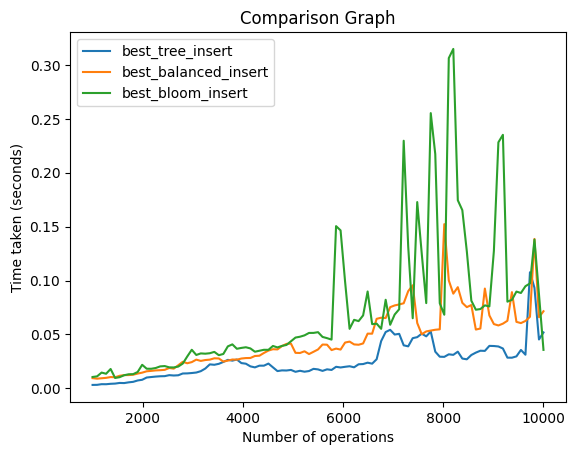

True

In [86]:
import timeit
import string
import random
import matplotlib.pyplot as plt

class TestDataGenerator(AbstractTestDataGenerator):
    
    def __init__(self):
        print('created obj')

        
    def generateData(self, size):     
        # ADD YOUR CODE HERE
        data = []
        
        for _ in range(size):
            s = ''
            for _ in range(random.randint(1, 9)):
                s += random.choice(string.ascii_lowercase + string.ascii_uppercase)
                # data.append(random.choice((string.ascii_lowercase + string.ascii_uppercase)))
            data.append(s)
        # return s
        return data


class SyntheticTesting:
    def __init__(self, min_size, max_size, step):
        # random.seed(0)
        self.data = []
        self.sizes = [int(i) for i in range(min_size, max_size+1, int((max_size-min_size)/step))]
        self.timedict = {'best_sequential_insert': [],
                         'worst_sequential_insert': [],
                         'best_tree_insert': [],
                         'worst_tree_insert': [],
                         'best_balanced_insert': [],
                         'worst_balanced_insert': [],
                         'best_bloom_insert': [],
                         'worst_bloom_insert': []}
        
        self.repeats = 1



    def generate_unsorted_data(self, size):
        return [''.join(random.choices(string.ascii_lowercase, k=random.randint(1,9))) for _ in range(size)]
        
    
    def generate_sorted_data(self, size):
        return sorted([''.join(random.choices(string.ascii_lowercase, k=random.randint(1,9))) for _ in range(size)], reverse=True)

    def generate_data_list(self, sorted=False):
        if sorted:
            self.sorted_data = [self.generate_sorted_data(size) for size in self.sizes]
        else:
            self.unsorted_data = [self.generate_unsorted_data(size) for size in self.sizes]


    def test_set_insert(self, data):
        self.set = SequentialSearchSet()
        for d in data:
            self.set.insertElement(d)

    def test_tree_insert(self, data):
        self.tree = BinarySearchTreeSet()
        for d in data:
            self.tree.insertElement(d)

    def test_balanced_insert(self, data):
        self.balanced = BalancedSearchTreeSet()
        for d in data:
            self.balanced.insertElement(d)

    def test_bloom_insert(self, data):
        self.bloom = BloomFilterSet()
        for d in data:
            self.balanced.insertElement(d)

    def run_tests(self, test_names):
        # make sure the test names being passed in are valid
        if not all(i in self.timedict.keys() for i in test_names):
            return False
        
        self.generate_data_list(sorted=True)
        self.generate_data_list(sorted=False)
        
        # need to make it generate data every time.
        for test_name in test_names:
            if test_name == 'worst_sequential_insert':
                print(f'{test_name} test begun!')
                self.timedict[test_name] = [timeit.timeit(lambda: self.test_set_insert(data), number=self.repeats) for data in self.sorted_data]
                print(f'{test_name} test complete in {sum(self.timedict[test_name])} seconds!')

            elif test_name == 'best_sequential_insert':
                print(f'{test_name} test begun!')
                self.timedict[test_name] = [timeit.timeit(lambda: self.test_set_insert(data), number=self.repeats) for data in self.unsorted_data]
                print(f'{test_name} test complete in {sum(self.timedict[test_name])} seconds!')

            elif test_name == 'worst_tree_insert':
                print(f'{test_name} test begun!')
                self.timedict[test_name] = [timeit.timeit(lambda: self.test_tree_insert(data), number=self.repeats) for data in self.sorted_data]
                print(f'{test_name} test complete in {sum(self.timedict[test_name])} seconds!')

            elif test_name == 'best_tree_insert':
                print(f'{test_name} test begun!')
                self.timedict[test_name] = [timeit.timeit(lambda: self.test_tree_insert(data), number=self.repeats) for data in self.unsorted_data]
                print(f'{test_name} test complete in {sum(self.timedict[test_name])} seconds!')

            elif test_name == 'worst_balanced_insert':
                print(f'{test_name} test begun!')
                self.timedict[test_name] = [timeit.timeit(lambda: self.test_balanced_insert(data), number=self.repeats) for data in self.sorted_data]
                print(f'{test_name} test complete in {sum(self.timedict[test_name])} seconds!')

            elif test_name == 'best_balanced_insert':
                print(f'{test_name} test begun!')
                self.timedict[test_name] = [timeit.timeit(lambda: self.test_balanced_insert(data), number=self.repeats) for data in self.unsorted_data]
                print(f'{test_name} test complete in {sum(self.timedict[test_name])} seconds!')

            elif test_name == 'worst_bloom_insert':
                print(f'{test_name} test begun!')
                self.timedict[test_name] = [timeit.timeit(lambda: self.test_bloom_insert(data), number=self.repeats) for data in self.sorted_data]
                print(f'{test_name} test complete in {sum(self.timedict[test_name])} seconds!')

            elif test_name == 'best_bloom_insert':
                print(f'{test_name} test begun!')
                self.timedict[test_name] = [timeit.timeit(lambda: self.test_bloom_insert(data), number=self.repeats) for data in self.unsorted_data]
                print(f'{test_name} test complete in {sum(self.timedict[test_name])} seconds!')

        self.plot_multi_graph()
        return True


    def plot_individual_graph(self, times, name):
        plt.plot(self.sizes, times, 'o-')
        plt.xlabel('Number of operations')
        plt.ylabel('Time taken (seconds)')
        plt.title(name)
        plt.show()

    def plot_multi_graph(self):
        for key in self.timedict.keys():
            times = self.timedict[key]
            if times != []:
                plt.plot(self.sizes, times, label=key)
        plt.legend(loc='upper left')
        plt.xlabel('Number of operations')
        plt.ylabel('Time taken (seconds)')
        plt.title('Comparison Graph')
        plt.show()
    

test_list = ['best_balanced_insert', 'best_tree_insert', 'best_bloom_insert']
test = SyntheticTesting(1000, 10000, 100)
test.run_tests(test_list)
# test.run_worst_sequential_insert()
# test.run_best_sequential_insert()
# test.run_worst_tree_insert()
# test.run_best_tree_insert()
# test.run_worst_balanced_insert()
# test.run_best_balanced_insert()
# test.plot_multi_graph()






Use the cells below for the python code needed to **fully evaluate your implementations**, first on real data and subsequently on synthetic data (i.e., read data from test files / generate synthetic one, instantiate each of the 4 set implementations in turn, then thorouhgly experiment with insert/search operations and measure their performance).

In [ ]:
import timeit
"""
def setup_sequential_search():
    # Create an instance of MyClass and call the function
    s = SequentialSearchSet
    d = myTestDataGenerator
    size = 1000
    data = d.generateData(size)
    for i in range(size):
        s.insertElement(i)


# Time the function and print the result
time_taken = timeit.timeit('setup_sequential_search()', setup='from __main__ import setup_sequential_search', number=100)
print("Time taken: {:.6f} seconds".format(time_taken))
"""

#balanced search tree test on text files.
with open("testfiles/test1-mobydick.txt", "r") as test1:
    contents_1 = test1.read()
with open("testfiles/test2-warpeace.txt", "r") as test2:
    contents_2 = test2.read()
with open("testfiles/test3-dickens.txt", "r") as test3:
    contents_3 = test3.read()
with open("testfiles/test-search.txt", "r") as test_search:
    test_contents = test_search.read()


s = BalancedSearchTreeSet()

def create_list(data):
    data = [w for w in contents_1.split(" ")]
    return data 

def search(list):
    for w in list:
        s.searchElement(w)

def insert(list):
    new_list = s.insert_from_list(list)
    return new_list


list_1 = create_list(contents_1)
list_2 = create_list(contents_2)
list_3 = create_list(contents_3)
test_search = create_list(test_contents)


rb_insert_1 = insert(list_1)
rb_insert_2 = insert(list_2)
rb_insert_3 = insert(list_3)

timed_insert_1 = timeit.timeit(lambda: rb_insert_1, number=10_000)
print("Time taken to insert 1: {:.6f} seconds".format(timed_insert_1))

timed_insert_2 = timeit.timeit(lambda: rb_insert_2, number=10_000)
print("Time taken to insert 2: {:.6f} seconds".format(timed_insert_2))

timed_insert_3 = timeit.timeit(lambda: rb_insert_3, number=10_000)
print("Time taken to insert 3: {:.6f} seconds".format(timed_insert_3))


rb_search_1 = search(list_1)
rb_search_2 = search(list_2)
rb_search_3 = search(list_3)

timed_search_1 = timeit.timeit(lambda: rb_search_1, number=10_000)
print("Time taken to search 1: {:.6f} seconds".format(timed_search_1))

timed_search_2 = timeit.timeit(lambda: rb_search_2, number=10_000)
print("Time taken to search 2: {:.6f} seconds".format(timed_search_2))

timed_search_3 = timeit.timeit(lambda: rb_search_3, number=10_000)
print("Time taken to search 3: {:.6f} seconds".format(timed_search_3))

def create_list(data):
    data = [w for w in contents_1.split(" ")]
    return data 


def insert_element_1(list):
    for w in list:
        binary_set_1.insertElement(w)



def search_element_1(list):
    for w in list: 
        binary_set_1.searchElement(w)





binary_set_1 = BinarySearchTreeSet()


bs_insert_1 = insert_element_1(list_1)
bs_insert_2 = insert_element_1(list_2)
bs_insert_3 = insert_element_1(list_3)

bs_search_1 = search_element_1(test_search)
bs_search_2 = search_element_1(test_search)
bs_search_3 = search_element_1(test_search)

bs_timed_insert_1 = timeit.timeit(lambda: bs_insert_1, number=10_000)
print("Time taken to insert 1: {:.6f} seconds".format(bs_timed_insert_1))
bs_timed_search_1 = timeit.timeit(lambda: bs_search_1, number = 500)
print("Time taken to search 1: {:.6f} seconds".format(bs_timed_search_1))


bs_timed_insert_2 = timeit.timeit(lambda: bs_insert_2, number=10_000)
print("Time taken to insert 2: {:.6f} seconds".format(bs_timed_insert_2))
bs_timed_search_2 = timeit.timeit(lambda: bs_search_2, number = 10_000)
print("Time taken to search 2: {:.6f} seconds".format(bs_timed_search_2))


bs_timed_insert_3 = timeit.timeit(lambda: bs_insert_3, number=10_000)
print("Time taken to insert 3: {:.6f} seconds".format(bs_timed_insert_3))
bs_timed_search_3 = timeit.timeit(lambda: bs_search_3, number = 10_000)
print("Time taken to search 3: {:.6f} seconds".format(bs_timed_search_3))



In [ ]:
import timeit

# ADD YOUR TEST CODE HERE TO WORK ON SYNTHETIC DATA



